In [36]:
 
# Basic stuff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# importing libraries for data visualisations
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
color = sns.color_palette()
import warnings
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint

warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
sns.set_context("notebook")



In [37]:
#importing data into variables
employee_survey = pd.read_csv('employee_survey_data.csv')
df_general = pd.read_csv('general_data.csv')
manager_survey = pd.read_csv('manager_survey_data.csv')
#Cleaning up some missing values by imputing the mean into employee_survey
employee_survey = employee_survey.fillna(employee_survey.mean())
# Merging dataframe manager_survey to df_general based on 'EmployeeID'
df_general = df_general.merge(manager_survey[['EmployeeID', 'JobInvolvement', 'PerformanceRating']], on='EmployeeID')
df_general.head(2)
# Merging dataframe employee_survey to df_general based on 'EmployeeID'
df_general = df_general.merge(employee_survey[['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance']], on='EmployeeID')
df_general.dropna(axis=0,inplace=True)
df_general.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [38]:
df_general.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [39]:
# let's break down the columns by their type (i.e. int64, float64, object)
df_general.columns.to_series().groupby(df_general.dtypes).groups

{int64: ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating'], float64: ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']}

In [40]:
df_general.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4382.0,36.933364,9.137272,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4382.0,9.198996,8.105396,1.0,2.00,7.0,14.00,29.0
Education,4382.0,2.912369,1.024728,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4382.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4382.0,2207.804884,1271.688783,1.0,1108.25,2208.5,3308.75,4409.0
JobLevel,4382.0,2.063898,1.106115,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4382.0,65061.702419,47142.310175,10090.0,29110.00,49190.0,83790.00,199990.0
NumCompaniesWorked,4382.0,2.693291,2.497832,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4382.0,15.210634,3.663007,11.0,12.00,14.0,18.00,25.0
StandardHours,4382.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [41]:
# Columns datatypes and missign values
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   object 
 2   BusinessTravel           4382 non-null   object 
 3   Department               4382 non-null   object 
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   object 
 7   EmployeeCount            4382 non-null   int64  
 8   EmployeeID               4382 non-null   int64  
 9   Gender                   4382 non-null   object 
 10  JobLevel                 4382 non-null   int64  
 11  JobRole                  4382 non-null   object 
 12  MaritalStatus            4382 non-null   object 
 13  MonthlyIncome            4382 non-null   int64  
 14  NumCompaniesWorked      

The data provided has no missing values. In HR Analytics, employee data is unlikely to feature large ratio of missing values as HR Departments typically have all personal and employment data on-file. However, the type of documentation data is being kept in (i.e. whether it is paper-based, Excel spreadhsheets, databases, etc) has a massive impact on the accuracy and the ease of access to the HR data.

## Summary Statistics of numeric variables

In [42]:
df_general.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,...,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,...,11.290278,2.798266,7.010497,2.191693,4.126198,2.730488,3.154039,2.723435,2.728107,2.761108
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,...,7.785717,1.289402,6.129351,3.224994,3.569674,0.710682,0.361028,1.090280,1.099224,0.704119
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [43]:
df_general.isnull().sum()


Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

## Exploratory Data Analysis

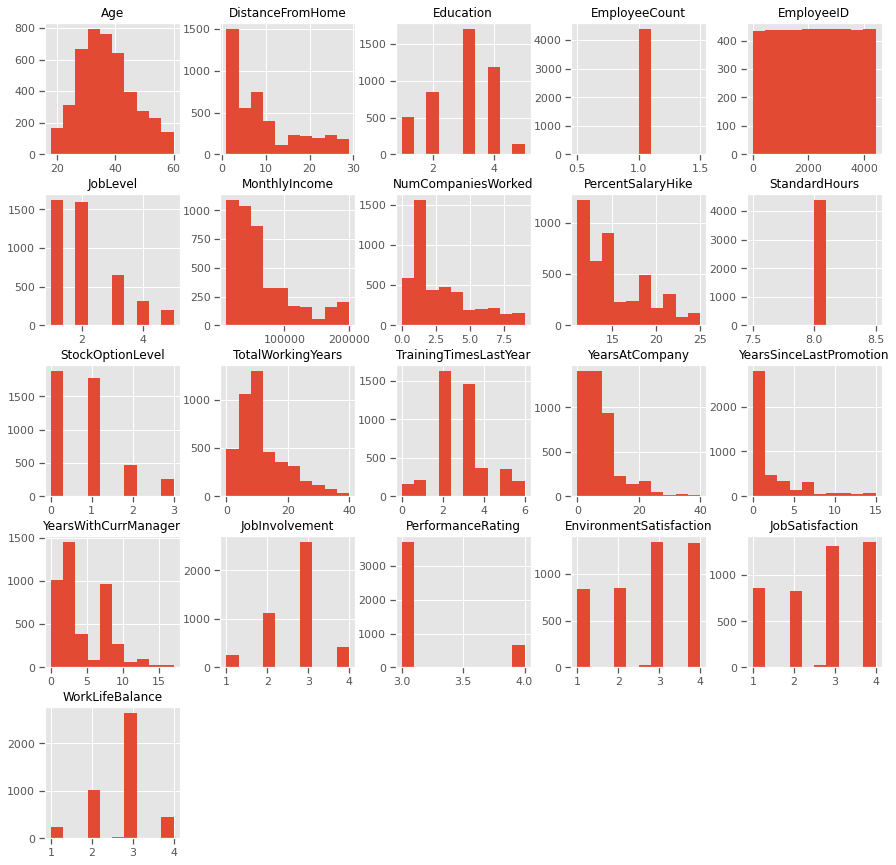

In [44]:
df_general.hist(figsize=(15,15))
plt.show()

A few observations can be made based on the information and histograms for numerical features:

Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.
EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.
Employee Number is likely to be a unique identifier for employees given the feature's quasi-uniform distribution.

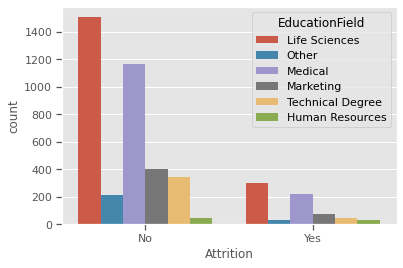

In [45]:
sns.countplot(x='Attrition', hue= 'EducationField', data = df_general)
plt.show()

We can see that employees with life science and medical degrees tend more for attrition, it could be because the higher degree level are not very attached to companies if they encountered the slightest discomfort in the workplace

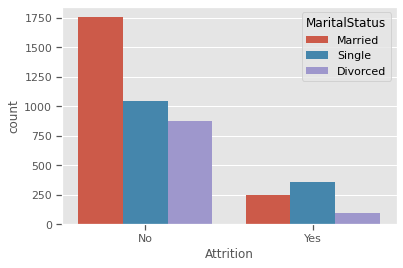

In [46]:
sns.countplot(x='Attrition', hue= 'MaritalStatus', data = df_general)
plt.show()

We can clearly see that the Singles are more likely to attrition as they don't care as much for a stable static life as the married employees.

## Numerical Count Plot

In [47]:
numCols = df_general.select_dtypes([np.number]).columns
numCols

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')

<Figure size 1296x432 with 0 Axes>

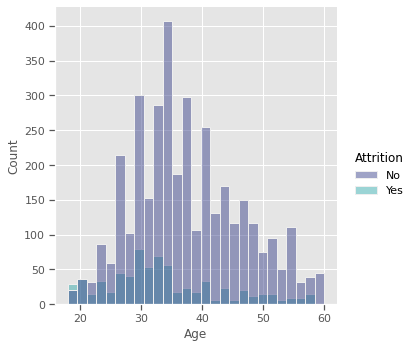

<Figure size 1296x432 with 0 Axes>

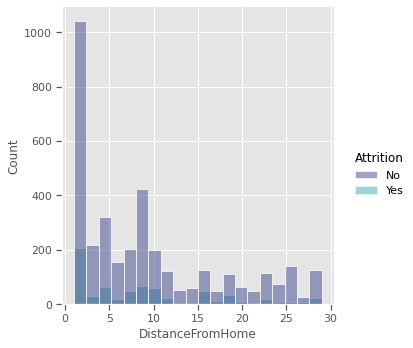

<Figure size 1296x432 with 0 Axes>

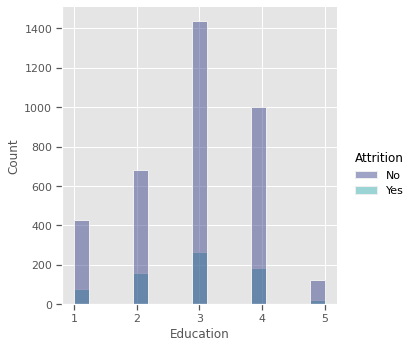

<Figure size 1296x432 with 0 Axes>

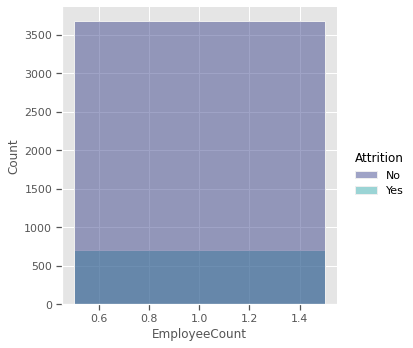

<Figure size 1296x432 with 0 Axes>

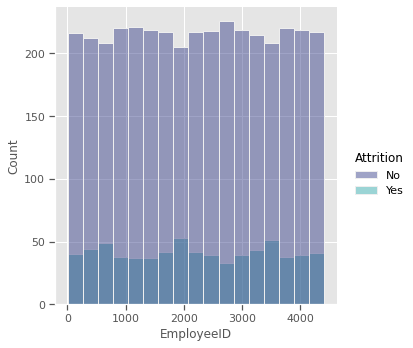

<Figure size 1296x432 with 0 Axes>

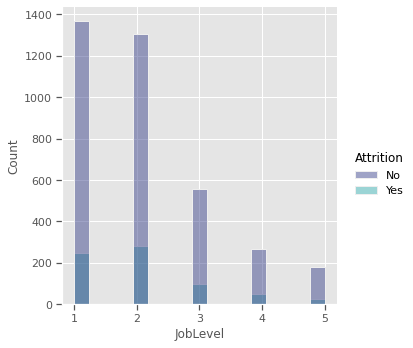

<Figure size 1296x432 with 0 Axes>

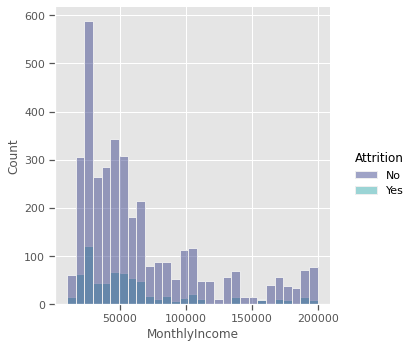

<Figure size 1296x432 with 0 Axes>

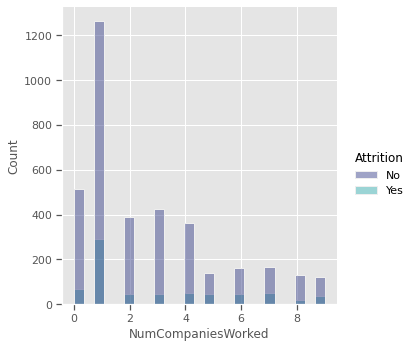

<Figure size 1296x432 with 0 Axes>

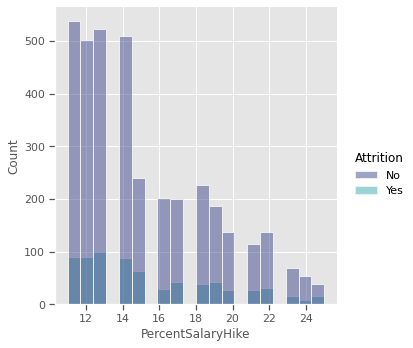

<Figure size 1296x432 with 0 Axes>

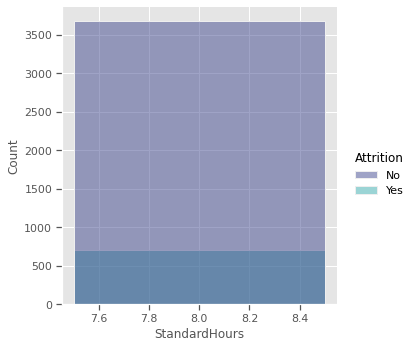

<Figure size 1296x432 with 0 Axes>

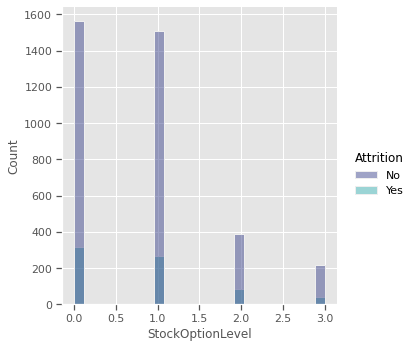

<Figure size 1296x432 with 0 Axes>

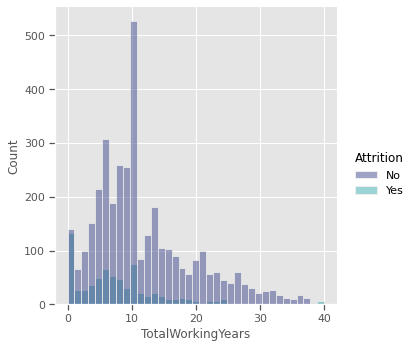

<Figure size 1296x432 with 0 Axes>

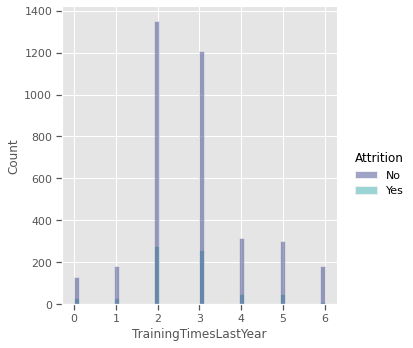

<Figure size 1296x432 with 0 Axes>

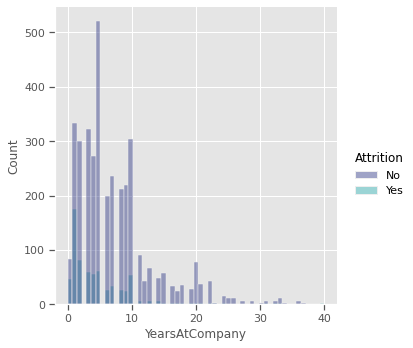

<Figure size 1296x432 with 0 Axes>

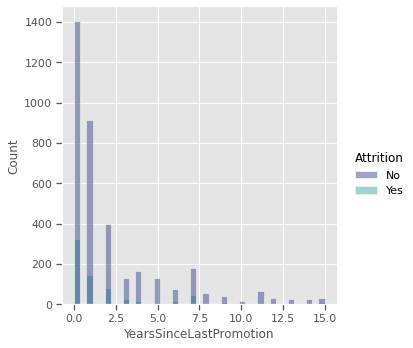

<Figure size 1296x432 with 0 Axes>

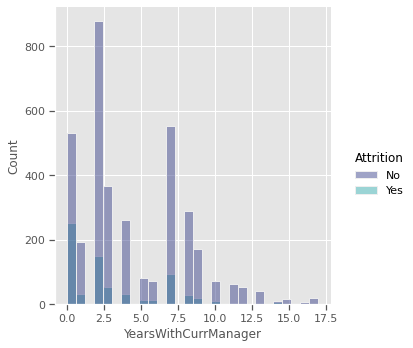

<Figure size 1296x432 with 0 Axes>

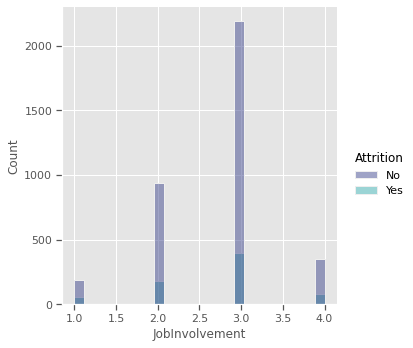

<Figure size 1296x432 with 0 Axes>

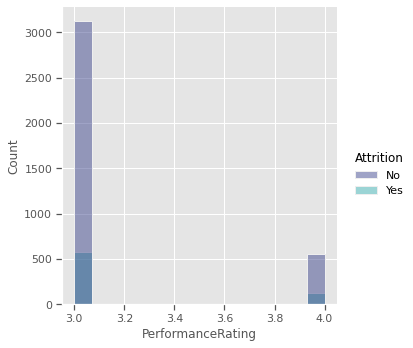

<Figure size 1296x432 with 0 Axes>

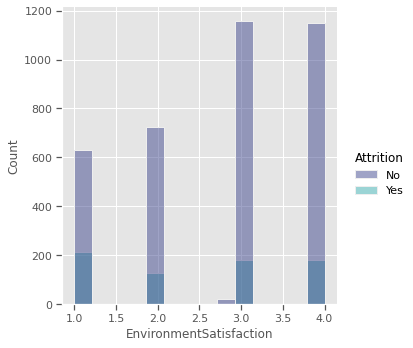

<Figure size 1296x432 with 0 Axes>

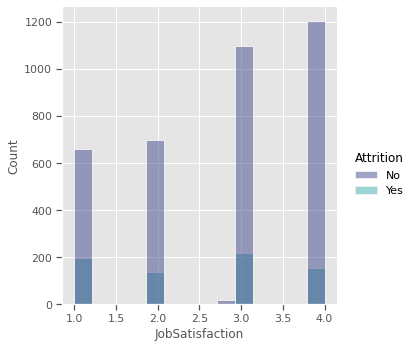

<Figure size 1296x432 with 0 Axes>

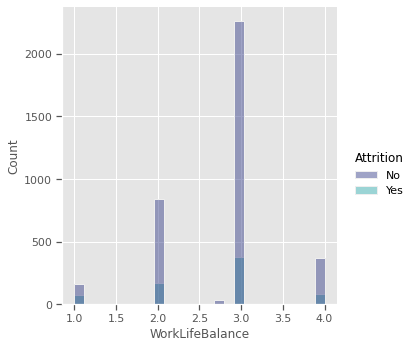

In [48]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.displot(x=col,data=df_general, palette="mako", hue='Attrition')
    plt.show()

## Categorical Count Plot

In [49]:
cat_cols=df_general.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(df_general[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(df_general.select_dtypes(include=object).describe())
display(cat_df)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
count,4382,4382,4382,4382,4382,4382,4382,4382
unique,2,3,3,6,2,9,3,1
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y
freq,3677,3109,2865,1806,2626,975,2007,4382


count
column         value                           
Attrition      Yes                          705
               No                          3677
BusinessTravel Non-Travel                   448
               Travel_Frequently            825
               Travel_Rarely               3109
Department     Human Resources              187
               Sales                       1330
               Research & Development      2865
EducationField Human Resources               80
               Other                        244
               Technical Degree             392
               Marketing                    475
               Medical                     1385
               Life Sciences               1806
Gender         Female                      1756
               Male                        2626
JobRole        Human Resources              156
               Research Director            237
               Sales Representative         246
               Manager                      305
               Healthcare Representative    389
               Manufacturing Director       429
               Laboratory Technician        773
               Research Scientist           872
               Sales Executive              975
MaritalStatus  Divorced                     970
               Single                      1405
               Married                     2007
Over18         Y                           4382

In [50]:
objCols = df_general.select_dtypes(['object']).columns.drop("Attrition")
objCols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='object')

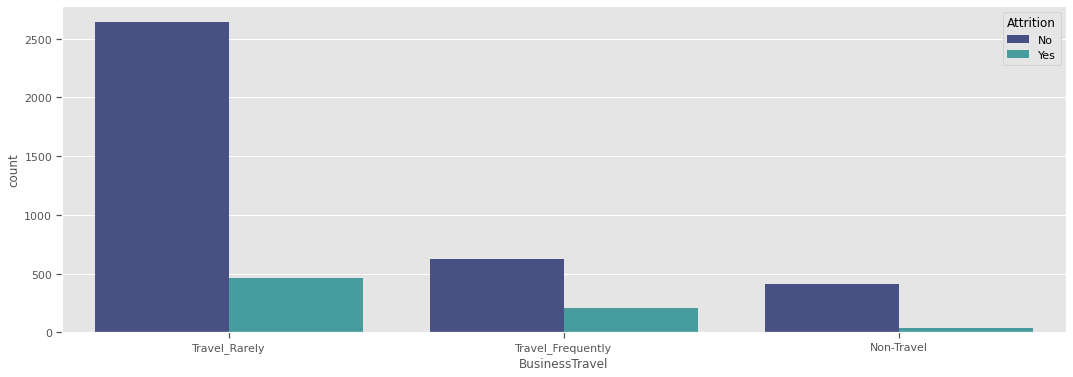

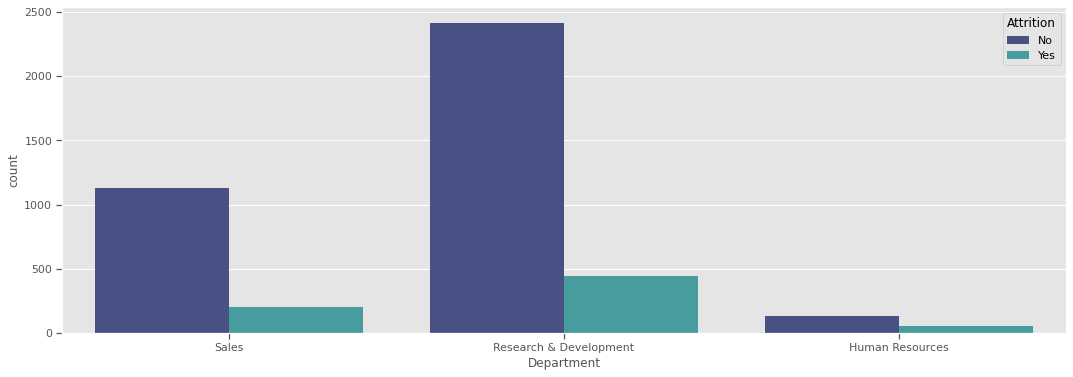

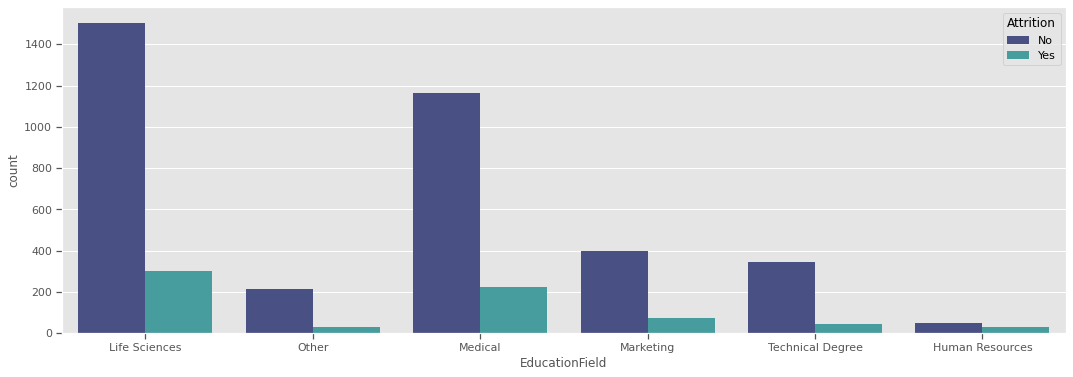

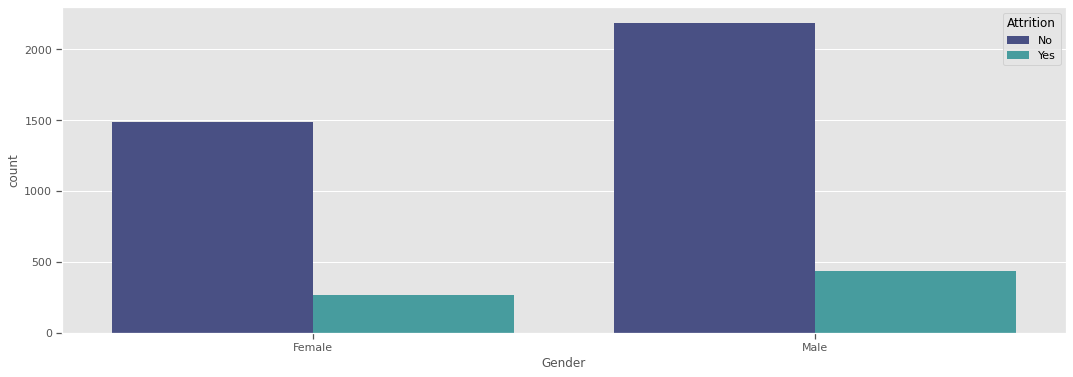

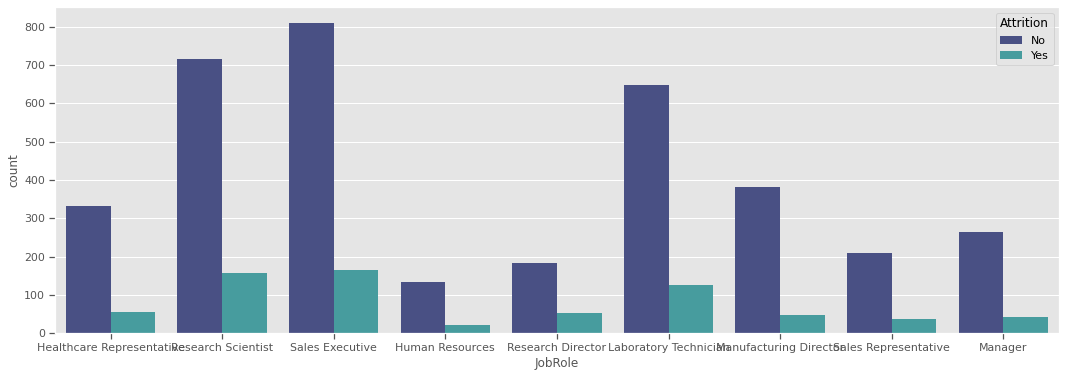

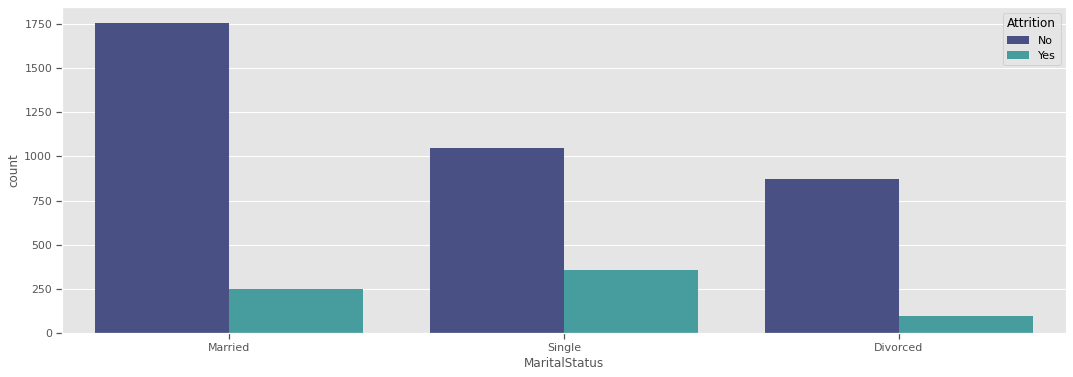

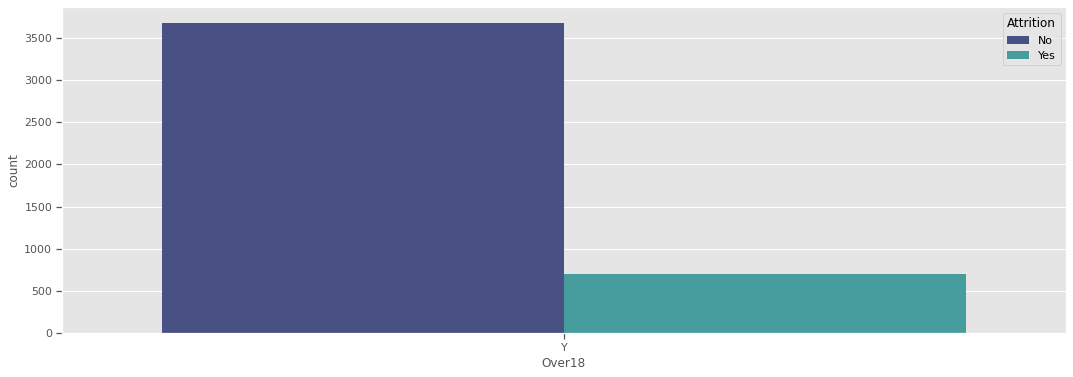

In [51]:
for col in objCols:
    plt.figure(figsize=(18,6))
    sns.countplot(x=col,data=df_general, palette="mako", hue="Attrition")
    plt.show()

Pie chart

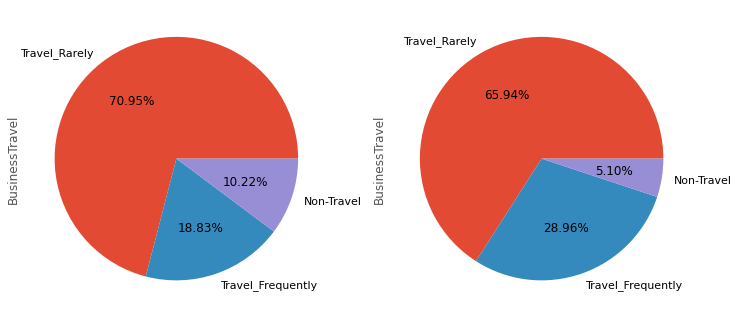

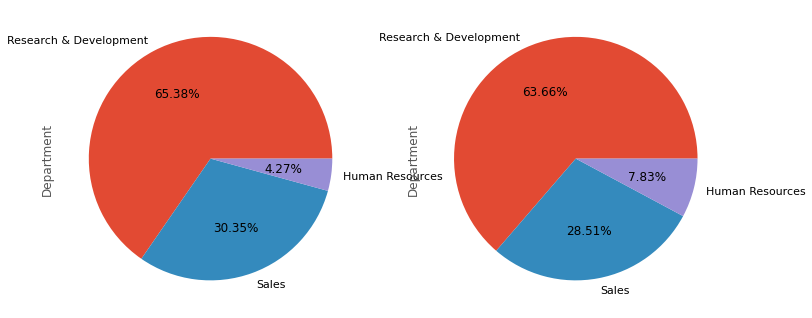

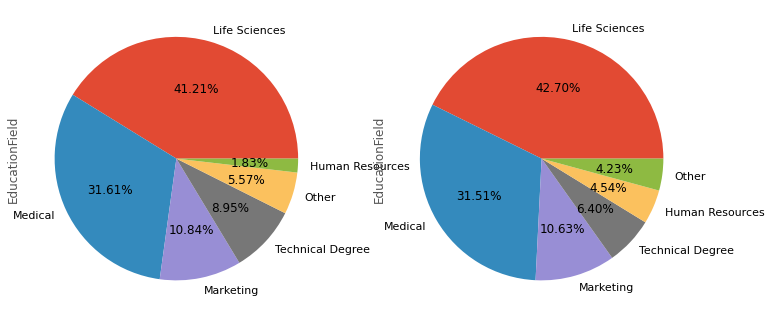

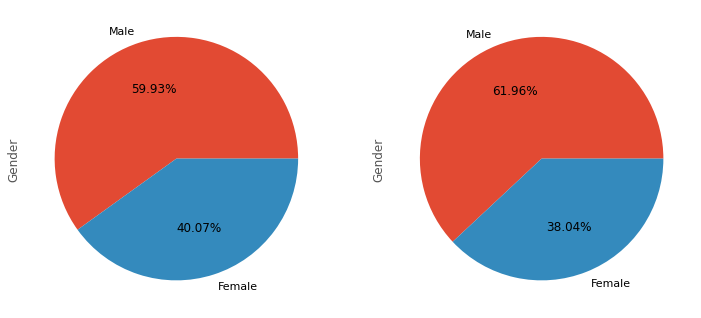

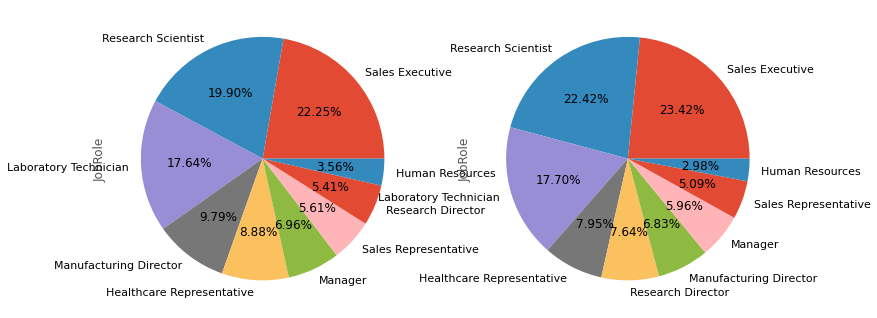

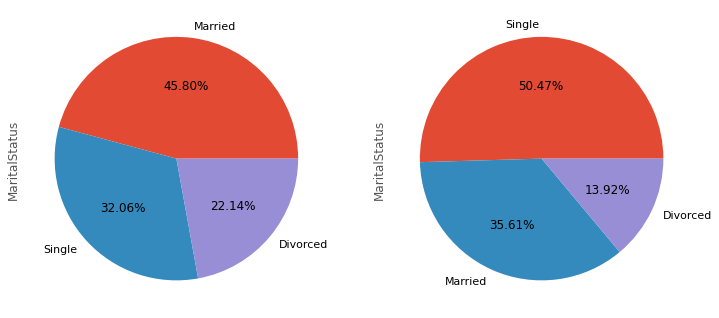

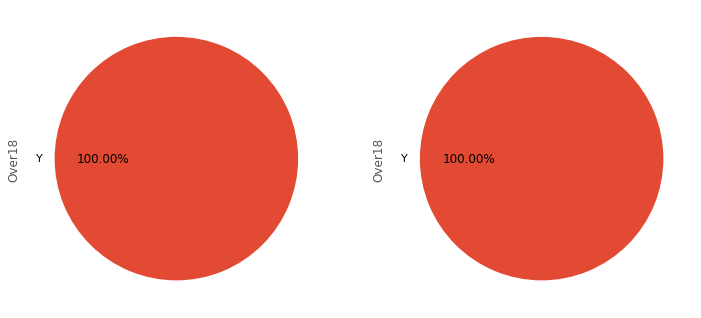

In [52]:
for col in objCols:
    fig, ax = plt.subplots(1,2, figsize=(12,12))
    round(df_general[col].value_counts()/df_general.shape[0]*100, 2).plot.pie(autopct="%1.2f%%", ax=ax[0])
    round(df_general[(df_general['Attrition'] == 'Yes')][col].value_counts()/df_general.shape[0]*100, 2).plot.pie(autopct="%1.2f%%", ax=ax[1])
    plt.show()

##More EDA

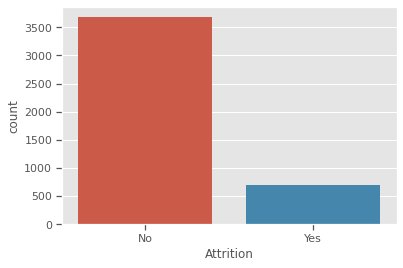

In [53]:
sns.countplot(x='Attrition', data = df_general)
plt.show()

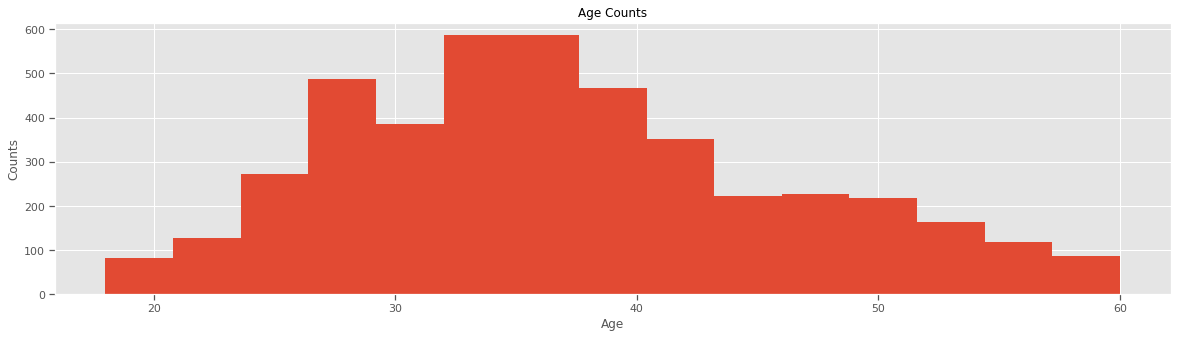

In [54]:
plt.figure(figsize=(20,5))
plt.hist(df_general.Age,bins=15)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

We can see that the most common age of employees is around 30 - 40

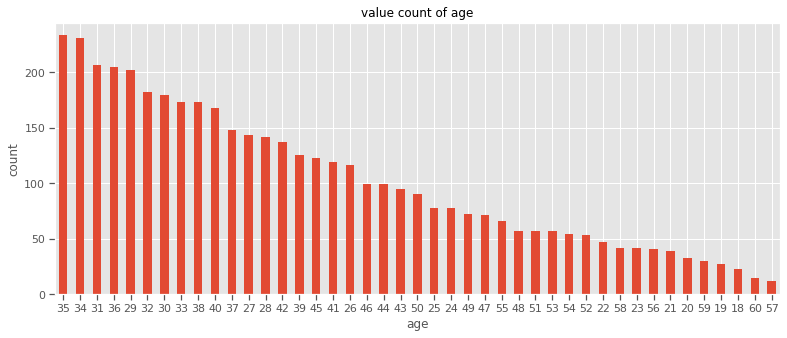

In [55]:
plt.figure(figsize=(13,5))
df_general.Age.value_counts().plot(kind="bar")
plt.title("value count of age")
plt.xlabel("age")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.show()

35 is the most common age

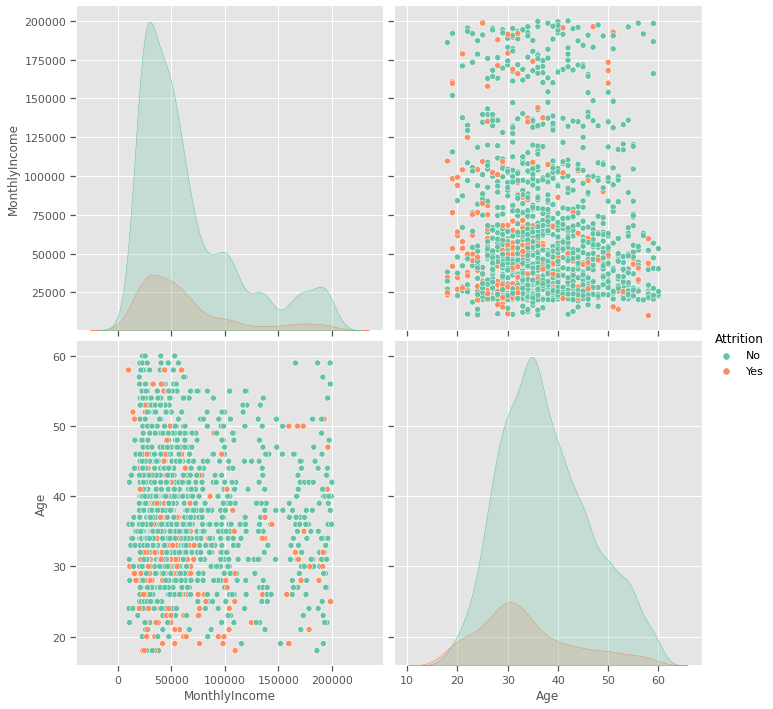

In [56]:
plt.style.use('ggplot')
g = sns.pairplot(df_general, vars=["MonthlyIncome", "Age"],hue="Attrition", palette = 'Set2' ,height=5)

Younger employees tend more to attrition as they are not attached to a stable life and have much more opportunitioes, unlike the older employees

Text(0.5, 1.0, 'Education Field Counts')

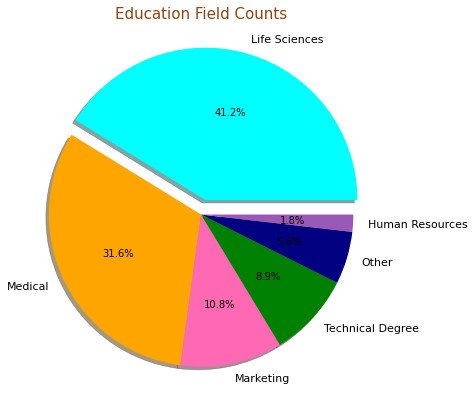

In [57]:
labels=df_general.EducationField.value_counts().index
colors=["cyan","orange","hotpink","green","navy","#9b59b6"]
sizes=df_general.EducationField.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%", explode=[0.1,0,0,0,0,0], shadow = True 
)
plt.title("Education Field Counts",color="saddlebrown",fontsize=15)

Is the education level related to attrition?

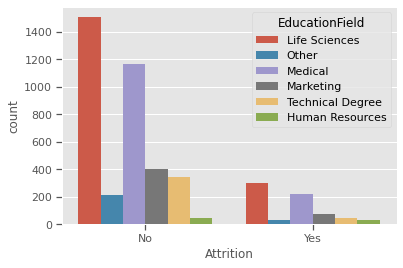

In [58]:
sns.countplot(x='Attrition', hue= 'EducationField', data = df_general)
plt.show()

We can see that employees with life science and medical degrees tend more for attrition, it could be because the higher degree level are not very attached to companies if they encountered the slightest discomfort in the workplace.

distribution of employees in Job roles?

Text(0.5, 1.0, 'Job Role')

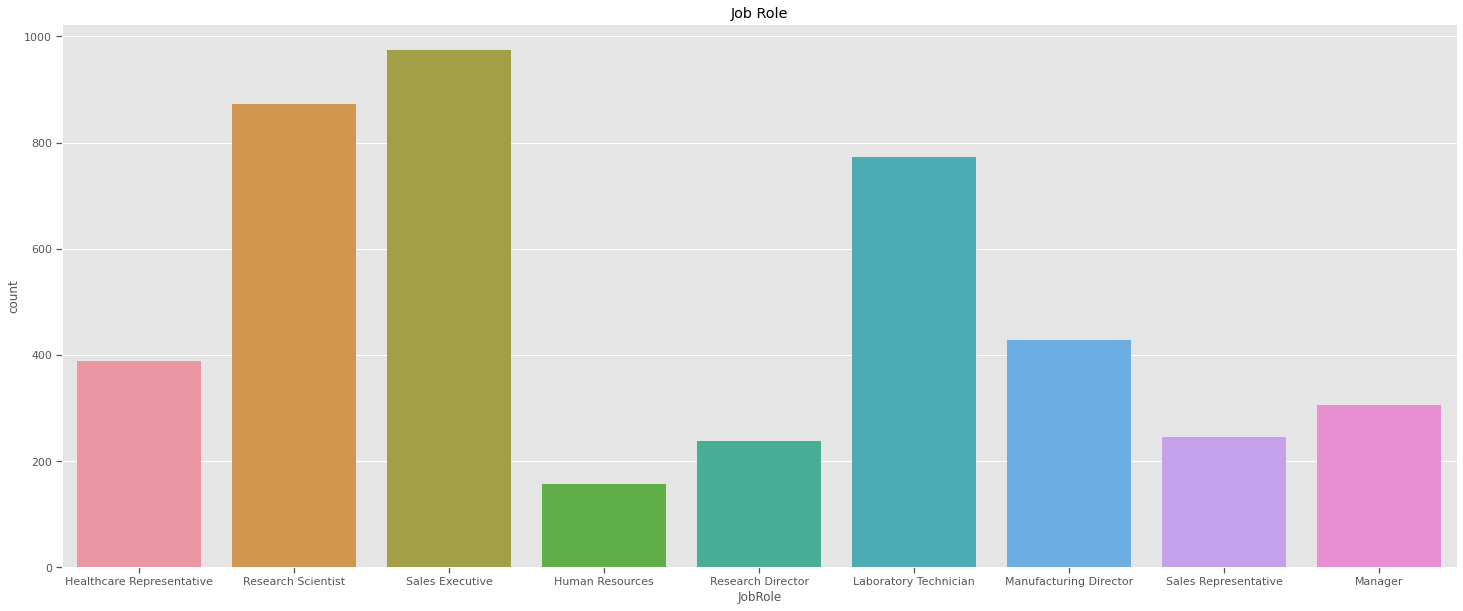

In [59]:
sns.countplot(df_general['JobRole'])
fig = plt.gcf()
fig.set_size_inches(25,10)
plt.title('Job Role')

#used the old method because variables are too many 

The most common Job role is sales executive.

What is the marital status for the employees?

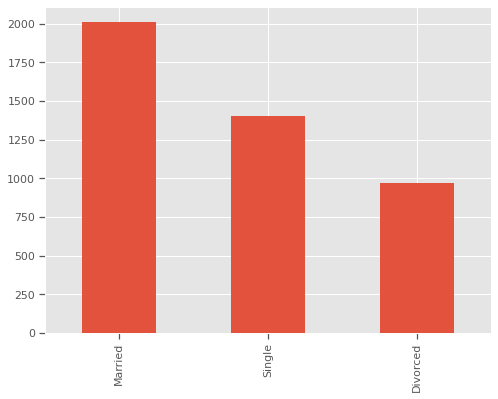

In [60]:
# number of married and unmarried employees
plt.figure(figsize=(8,6))
df_general.MaritalStatus.value_counts().plot(kind='bar',alpha=.95)
plt.show()

Relationship between marital status and attrition

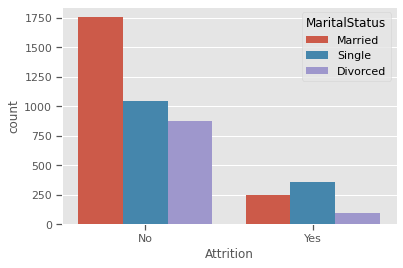

In [61]:
sns.countplot(x='Attrition', hue= 'MaritalStatus', data = df_general)
plt.show()

We can clearly see that the Singles are more likely to attrition as they don't care as much for a stable static life as the married employees.

Relationship with working years and income:

<Figure size 288x144 with 0 Axes>

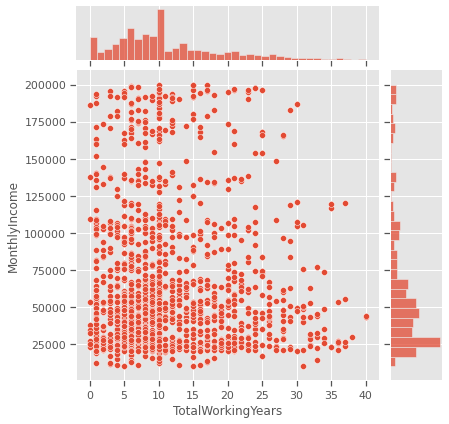

In [62]:
plt.figure(figsize=(4,2))
plt.style.use('ggplot')
sns.jointplot(x='TotalWorkingYears', y='MonthlyIncome', data=df_general)

We can see the more experinced employees have higher income.

Dropping useless features

In [63]:
df_general.drop(columns=['EmployeeCount','Over18','StandardHours'], axis = 1, inplace = True)

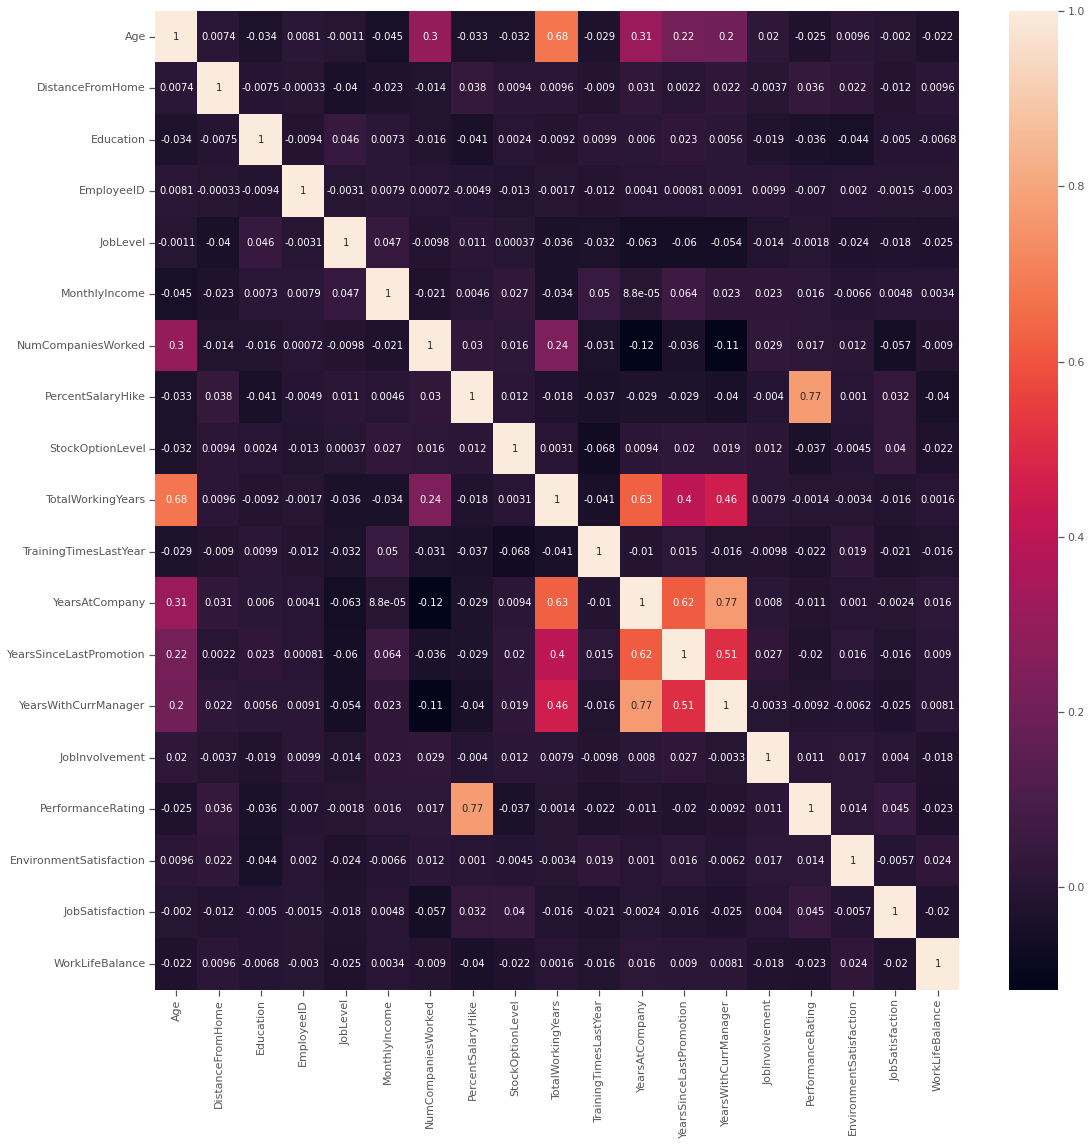

In [64]:
#let's check the correlation of data
plt.subplots(figsize = (18, 18))
sns.heatmap(df_general.corr(), annot = True)

Here, age is highly related to all parameters and job level highly related to total working hours and also the mothly income

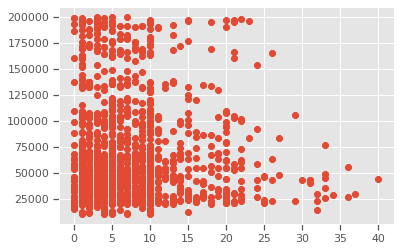

In [66]:
plt.scatter(df_general["YearsAtCompany"], df_general["MonthlyIncome"])

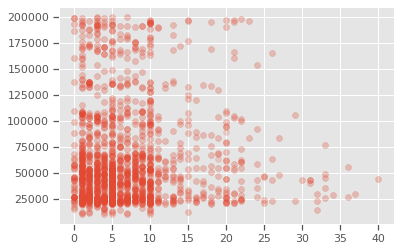

In [67]:
plt.scatter(df_general["YearsAtCompany"], df_general["MonthlyIncome"] , alpha=0.1)

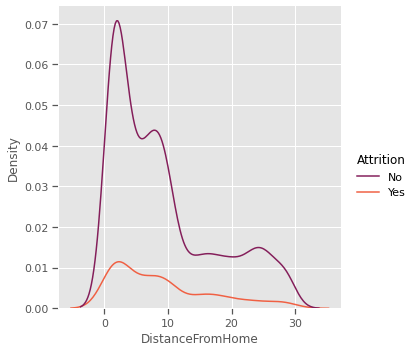

In [70]:
sns.displot(data = df_general, x = 'DistanceFromHome', hue = 'Attrition', kind="kde",palette='rocket')

At the smaller distances the possiblity is too small for the employee to get attrited and it is the same at the larger distances, so we can say that the distance from home has nothing to do with the attrition

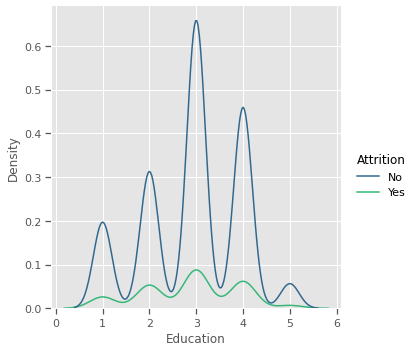

In [72]:
sns.displot(data = df_general, x = 'Education', hue = 'Attrition', kind="kde",palette='viridis')

Education isn't related to the attrition.